In [86]:
import pandas as pd 
from sklearn.metrics import roc_auc_score
from sklearn import linear_model


In [87]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

In [88]:
import scikitplot as skplt

In [89]:
import sklearn as sk 

In [115]:
from sklearn.model_selection  import train_test_split

In [90]:
# Import the scikitplot module
import scikitplot as skplt

In [108]:
#import data file set up is basetable
basetable = pd.read_csv('type_smells_2.csv')

In [116]:
basetable

,url,commit,parents,java s112,java s112.1,java s119,java s119.1,java:S106,java:S106.1,java s1068,...,sum_smells_open_commit,sum_smell_closed,remove_smell,open_time,closed_time,time,changed_file,additions,deletions,Dev
0,https://github.com/apache/flink/pull/2342,58165d69fb,73c73e92750a,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,5,-3,9/1/2015 22:25,8/24/2016 17:09,18:43:45,45,429,253,1
1,https://github.com/apache/flink/pull/5947,5ac4d2960984,a4afe2fe9,0.0,0.0,8.0,0.0,1.0,0.0,0.0,...,9,8,-1,2/5/2018 4:58,4/5/2018 21:07,16:09:00,15,843,327,2
2,https://github.com/apache/flink/pull/470,b0b12952c,84b04beba,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,7,7,0,9/9/2014 16:16,1/8/2015 23:40,7:23:36,9,326,148,1
3,https://github.com/apache/flink/commit/a3e2ae47d9,a3e2ae47d9,4497e96b9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17,1,-16,3/16/2021 20:12,3/24/2021 19:29,23:16:43,5,127,79,2
4,https://github.com/apache/flink/commit/42ada8a...,ce345e394df,42ada8ad9ca28,2.0,3.0,0.0,8.0,0.0,0.0,0.0,...,2,14,12,7/9/2018 17:02,7/13/2018 2:03,9:01:02,9,955,36,2
5,https://github.com/apache/flink/commit/1162caca85,fa75af096f,1162caca85,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,1,-9,8/3/2014 2:19,8/18/2014 21:22,19:03:30,32,249,1180,2
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34,23,11,NaN,NaN,18:34:33,12,156,78,1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,-7,NaN,NaN,156:38:38,32,567,424,2
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,4,-2,NaN,NaN,38:43:30,14,132,59,1
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,13,-1,NaN,NaN,84:44:30,17,156,257,1


In [107]:
logreg = linear_model.LogisticRegression()
logreg

LogisticRegression()

In [93]:
# Create a dataframe x is perdiction

x = basetable[['sum_smells_open_commit',
                'sum_smell_closed',
                'remove_smell',
                'changed_file',
                'deletions',
                'Dev']]

In [109]:
# Create a dataframe y is
y = basetable[["time"]]

In [110]:
#
logreg = linear_model.LogisticRegression()
logreg.fit(x, y)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [111]:
# Assign the coefficients to a list coef
coef = logreg.coef_
for p,c in zip(x,list(coef[0])):
    print(p + '\t' + str(c))

sum_smells_open_commit	0.5337286481757
sum_smell_closed	0.0545548284884603
remove_smell	0.4544118530499884
changed_file	0.12194763062215229
deletions	-0.04152615856484869
Dev	0.04193436174470975


In [112]:
# Assign the intercept to the variable intercept
intercept = logreg.intercept_
print(intercept)

[ 0.0517698   0.02314502  0.01550631 -0.01888811 -0.02763558  0.00014803
 -0.07334486 -0.01015159  0.06157597  0.00432776 -0.0166339   0.02771722
 -0.04279922  0.01888442 -0.0273719  -0.00146241 -0.02546867 -0.03806428
 -0.00569321  0.0498318  -0.01321853 -0.00843985  0.01759961  0.02742533
 -0.03867508  0.00366496  0.02706301 -0.01376202 -0.00258842  0.03553841]


In [113]:
# Make a prediction for each observation
predictions = logreg.predict_proba(x)
print(predictions[0:5])

[[1.95345363e-12 8.19155387e-06 2.96375723e-05 3.33211463e-04
  4.20349034e-05 8.76283750e-39 8.81747374e-07 1.31992294e-10
  5.49242233e-10 2.73353780e-32 9.34711835e-01 7.02492352e-21
  2.85576782e-20 4.35669684e-13 1.03761317e-11 1.19144813e-10
  1.12724393e-19 1.06232310e-04 5.37893971e-09 6.43811049e-02
  4.10888329e-15 1.08169484e-11 6.18779564e-10 1.15041981e-04
  2.42929098e-07 5.90353125e-17 5.12145735e-08 2.71369028e-04
  1.58291343e-07 6.85529103e-21]
 [1.10038195e-13 3.92998818e-03 3.36843945e-11 2.95026868e-05
  1.27655882e-02 1.49410950e-46 8.66762061e-06 7.45923146e-01
  3.29720535e-08 8.96224659e-37 1.18252796e-08 1.23790496e-27
  3.80480724e-04 1.26431043e-11 1.42170835e-03 8.48482320e-02
  1.83756734e-09 2.72186185e-03 5.63910337e-04 1.20833281e-07
  3.14815399e-02 1.70381030e-17 2.53135949e-07 2.29407301e-02
  2.61719863e-04 2.61291946e-37 4.35830821e-02 5.42386002e-05
  4.90851831e-02 1.46483023e-25]
 [2.14851123e-05 8.43562696e-02 2.03764542e-04 8.28161862e-03
  1.

In [120]:
df  = pd.read_csv("type_smells_2.csv")
df

,url,commit,parents,java s112,java s112.1,java s119,java s119.1,java:S106,java:S106.1,java s1068,...,sum_smells_open_commit,sum_smell_closed,remove_smell,open_time,closed_time,time,changed_file,additions,deletions,Dev
0,https://github.com/apache/flink/pull/2342,58165d69fb,73c73e92750a,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,5,-3,9/1/2015 22:25,8/24/2016 17:09,18:43:45,45,429,253,1
1,https://github.com/apache/flink/pull/5947,5ac4d2960984,a4afe2fe9,0.0,0.0,8.0,0.0,1.0,0.0,0.0,...,9,8,-1,2/5/2018 4:58,4/5/2018 21:07,16:09:00,15,843,327,2
2,https://github.com/apache/flink/pull/470,b0b12952c,84b04beba,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,7,7,0,9/9/2014 16:16,1/8/2015 23:40,7:23:36,9,326,148,1
3,https://github.com/apache/flink/commit/a3e2ae47d9,a3e2ae47d9,4497e96b9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17,1,-16,3/16/2021 20:12,3/24/2021 19:29,23:16:43,5,127,79,2
4,https://github.com/apache/flink/commit/42ada8a...,ce345e394df,42ada8ad9ca28,2.0,3.0,0.0,8.0,0.0,0.0,0.0,...,2,14,12,7/9/2018 17:02,7/13/2018 2:03,9:01:02,9,955,36,2
5,https://github.com/apache/flink/commit/1162caca85,fa75af096f,1162caca85,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,1,-9,8/3/2014 2:19,8/18/2014 21:22,19:03:30,32,249,1180,2
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34,23,11,NaN,NaN,18:34:33,12,156,78,1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,-7,NaN,NaN,156:38:38,32,567,424,2
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,4,-2,NaN,NaN,38:43:30,14,132,59,1
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,13,-1,NaN,NaN,84:44:30,17,156,257,1


In [105]:
#take function use variable, the target, and the base table as an argument
def auc(variable , target , basetable):
    x1 = basetable[variable]
    y1 = basetable[target]
    logreg =linear_model.LogisticRegression()
    logreg.fit(x1 ,y1)
    #multi class 
    #preds = logreg.predict_proba(x1)
    #roc_auc = roc_auc_score(y1,preds,multi_class='ovr')
    predictions = logreg.predict_log_proba(x1)[:,1]
    auc = roc_auc_score(y1 , predictions)
    return(auc)

In [104]:
predictions = logreg.predict_log_proba(x)
auc = roc_auc_score(y, predictions )
print(round(auc,2))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [25]:
#data 2 catitory
variables_1 = ['sum_smells_open_commit',
                'sum_smell_closed',
                'remove_smell']

In [26]:
variables_2 = ['changed_file',
                'additions',
                'deletions',
                'Dev']

In [27]:
X_1 = basetable[variables_1]
X_2 = basetable[variables_2]
y = basetable[["time"]]

In [28]:
logreg = linear_model.LogisticRegression()

In [29]:
logreg.fit(X_1, y)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
predictions_1 = logreg.predict_proba(X_1)[:,1]
predictions_1

array([2.96666483e-02, 1.10094808e-01, 1.20789358e-01, 3.31718560e-13,
       1.18722541e-04, 4.09096885e-07, 3.83155255e-03, 3.62936199e-03,
       5.21304072e-02, 8.64406950e-02, 1.38264517e-03, 5.21304072e-02,
       2.71232027e-06, 1.21756465e-10, 1.82560669e-01, 3.84144955e-02,
       1.96579457e-02, 4.27039150e-03, 1.09104003e-03, 2.17611809e-06,
       1.37937212e-02, 8.16684494e-04, 4.04059010e-02, 7.21023486e-02,
       1.72595350e-02, 4.84980805e-02, 1.37290452e-02, 7.55740043e-07,
       1.11527781e-29, 3.90454367e-04, 3.90454367e-04, 3.90454367e-04,
       3.90454367e-04, 3.90454367e-04, 3.90454367e-04, 3.90454367e-04,
       3.90454367e-04, 3.90454367e-04, 3.90454367e-04, 3.90454367e-04,
       3.90454367e-04, 3.90454367e-04, 3.90454367e-04, 3.90454367e-04,
       3.90454367e-04, 3.90454367e-04, 3.90454367e-04, 3.90454367e-04,
       3.90454367e-04, 3.90454367e-04, 3.90454367e-04, 3.90454367e-04,
       3.90454367e-04, 3.90454367e-04, 3.90454367e-04, 3.90454367e-04,
      

In [ ]:
#auc = roc_auc_score(y,predictions_1)

In [35]:
# Create dataframes with variables and target
x_set = basetable.drop("time", 1)

In [39]:
y = basetable["time"]

In [43]:
# Carry out 70-30 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split( x_set, y, test_size = 0.33, random_state=42)

In [44]:
# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [79]:
variables = ['sum_smells_open_commit',
                'sum_smell_closed',
                'remove_smell',
                'changed_file',
                'additions'
                'deletions',
                'Dev']

In [54]:
# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []

In [55]:
#add variables
variables_evaluate = []

In [117]:

auc_train_test = auc( variables , ["time"], basetable)
print(round(auc_train_test,2))

KeyError: "['additionsdeletions'] not in index"

In [75]:
#loop variables 
for v in variables:
    variables_evaluate.append(v)
    # 
    auc_train, auc_test = auc_train_test(variables_evaluate, ["time"], train, test)
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

NameError: name 'auc_train_test' is not defined

In [ ]:
 #Make plot of the AUC values

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (6).

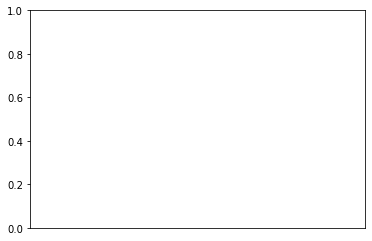

In [80]:
x = np.array(range(0,len(auc_values_train)))

y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)

plt.xticks(x, variables, rotation = 90)
plt.plot(x,y_train)
plt.plot(x,y_test)
plt.ylim((0.6, 0.8))
plt.show()

In [ ]:
random_predictions = [random.uniform(0,1) for _ in range(len(targets_test))]

NameError: name 'targets_test' is not defined

In [ ]:
# Plot the lift curve
skplt.metrics.plot_lift_curve(targets_test , predictions_test)
plt.show()

NameError: name 'targets_test' is not defined